In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("C:/Users/ragu/Min_pj_3/parkinsons - parkinsons.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# EDA Explorotry data analysis

In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df.shape

(195, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [9]:
df.duplicated().sum()

0

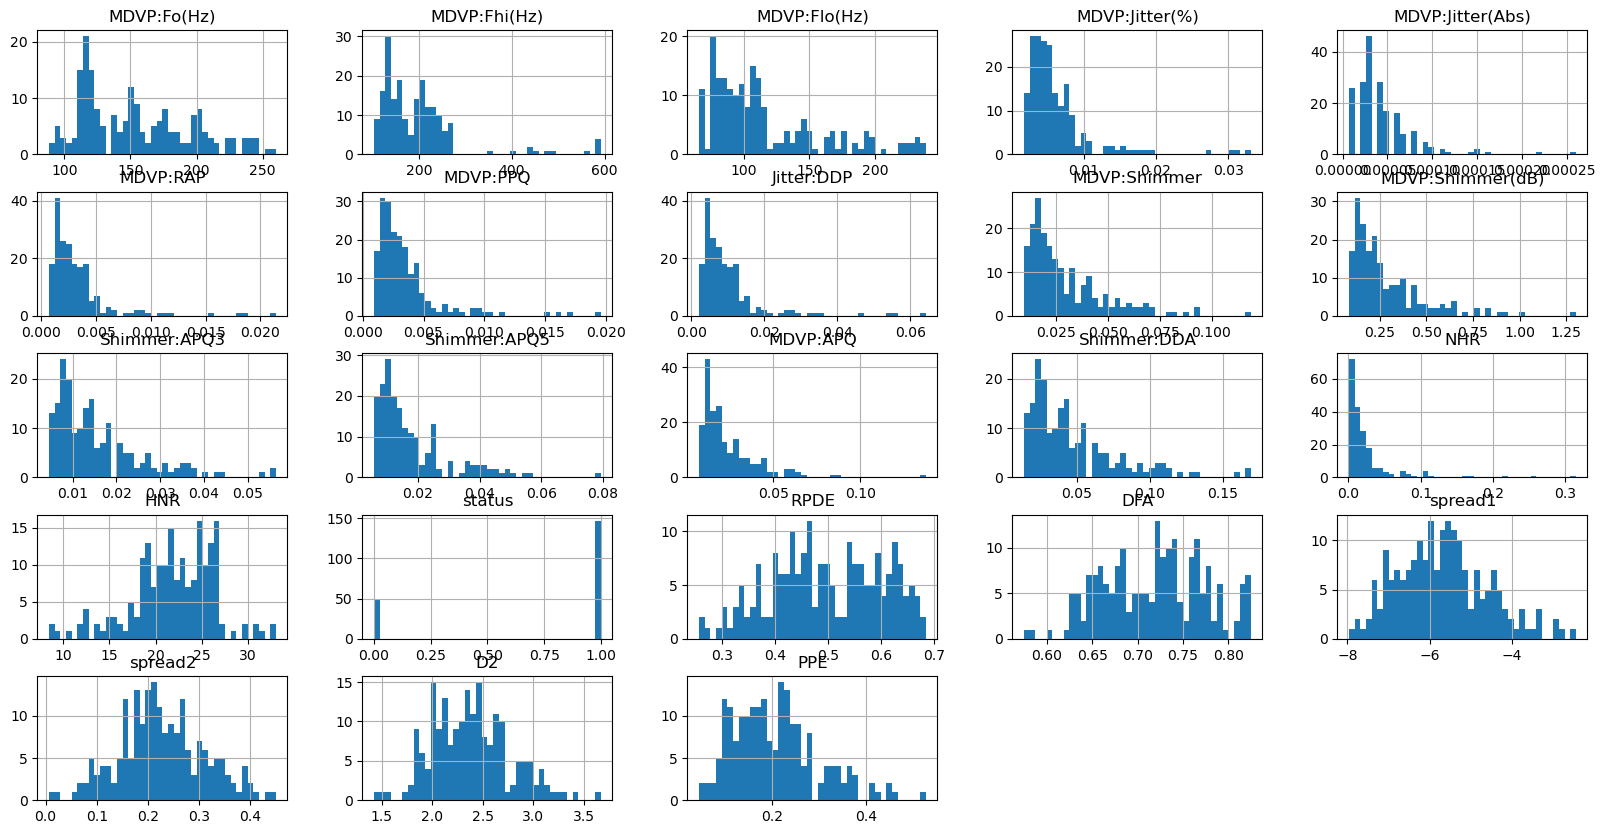

In [10]:
df.hist(figsize=(20, 10), bins=40)  
plt.show()

In [15]:
df1 = df.drop(columns=["name"])

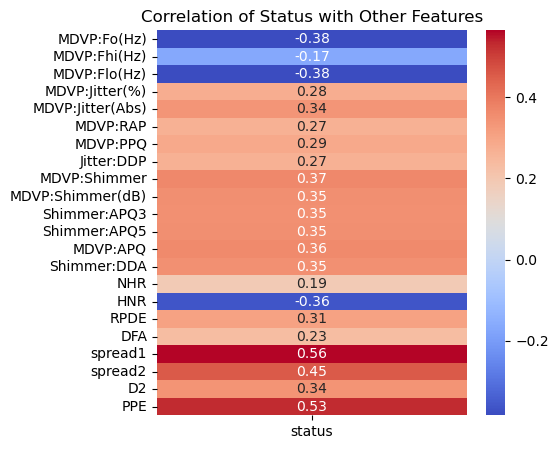

In [16]:
# Compute correlation of "Status" with all other columns
correlation_matrix = df1.corr()[["status"]].drop(index="status")

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Status with Other Features")
plt.show()

In [ ]:
#Corelated to parkinsons (status)
# "PPE","spread1","spread2","MDVP:Shimmer","MDVP:APQ","Shimmer:APQ3","Shimmer:APQ5","MDVP:Shimmer(dB)"(Highly corelated)
# "RPDE","shimmer:DDA","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP",MDVP:Jitter(%)(medium corelated)

In [ ]:
#Negative correlation Parkinson’s (status)
# MDVP:Fo(HZ),MDVP:Fhi(Hz),MDVP:Flo(Hz),HNR 

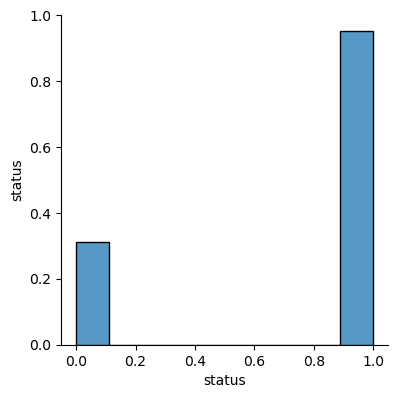

In [18]:
#Univariate analysis (Data imbalanc)
sns.pairplot(df[["status"]],height=4)
plt.show()

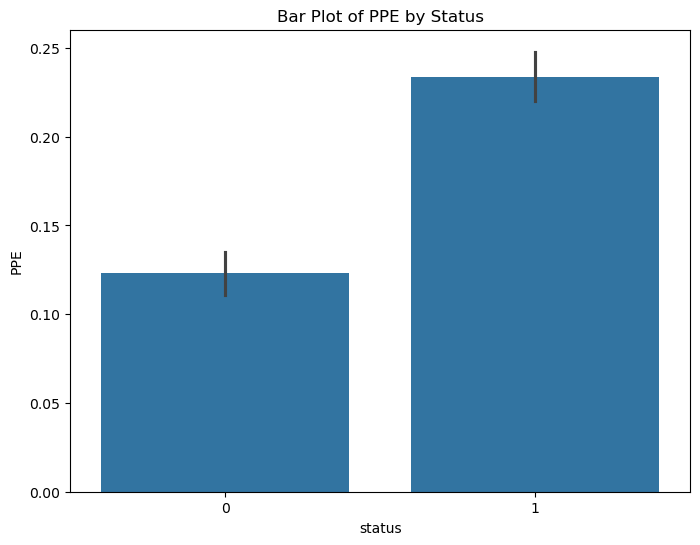

In [19]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="PPE", data=df)  
plt.title("Bar Plot of PPE by Status")
plt.show()

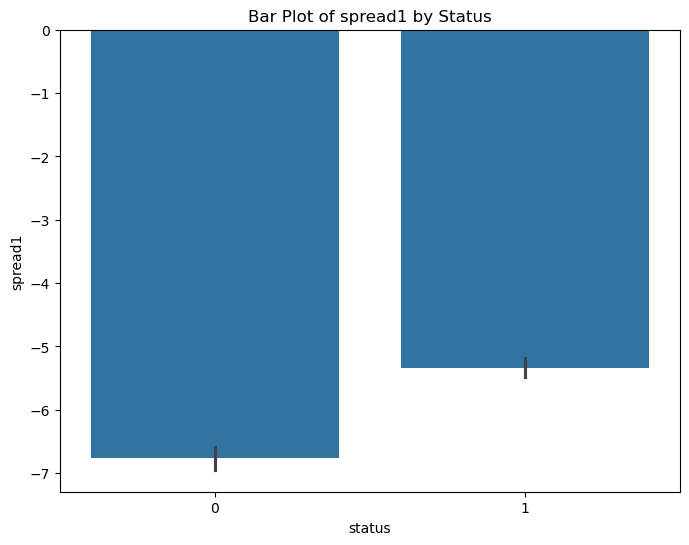

In [48]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="spread1", data=df)  
plt.title("Bar Plot of spread1 by Status")
plt.show()

In [49]:
#check
correlation = df['status'].corr(df['spread2'])
print("Correlation between status and spread2:", correlation)

Correlation between status and spread2: 0.4548421261086418


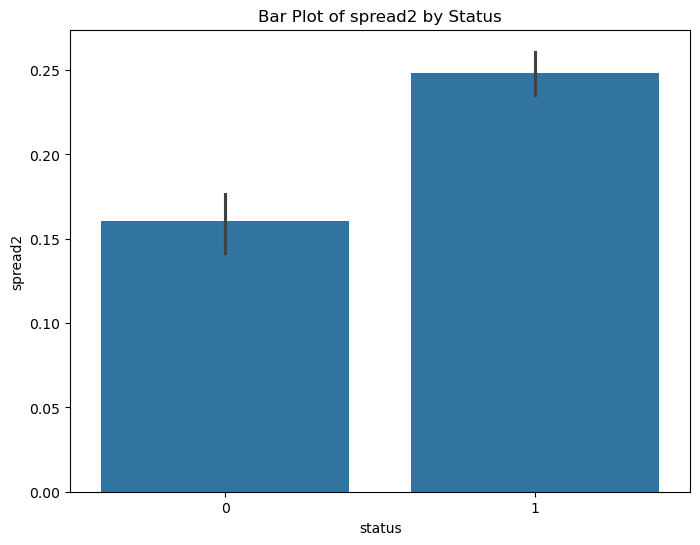

In [47]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="spread2", data=df)  
plt.title("Bar Plot of spread2 by Status")
plt.show()

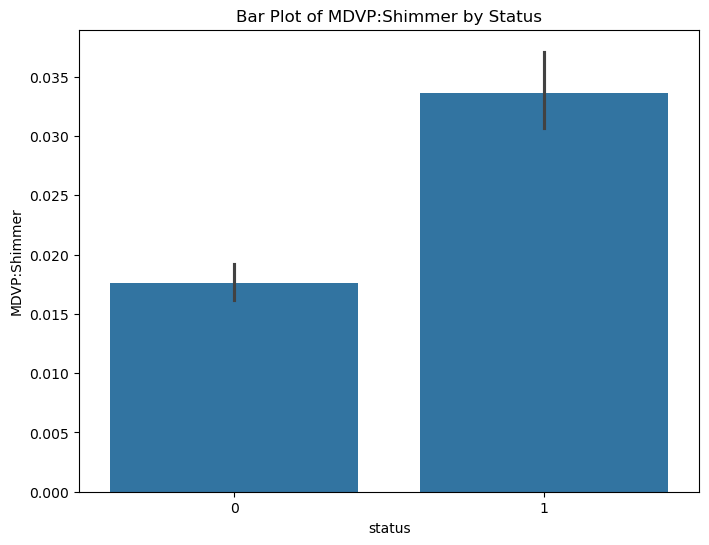

In [46]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="MDVP:Shimmer", data=df)  
plt.title("Bar Plot of MDVP:Shimmer by Status")
plt.show()

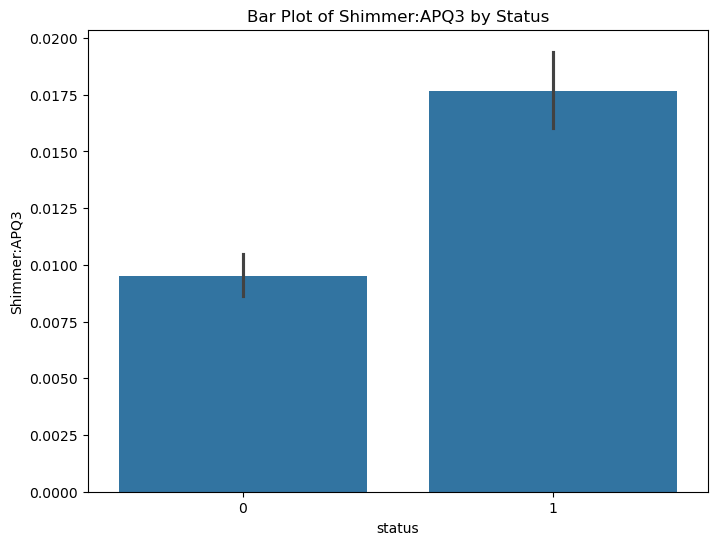

In [45]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="Shimmer:APQ3", data=df)  
plt.title("Bar Plot of Shimmer:APQ3 by Status")
plt.show()

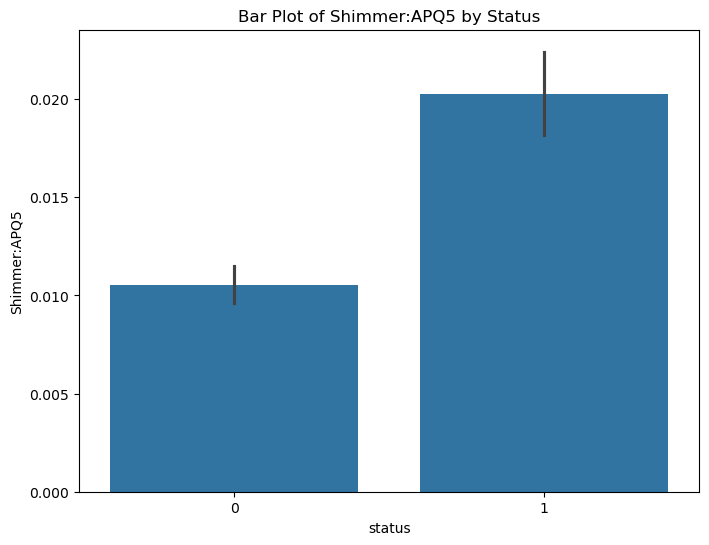

In [44]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="Shimmer:APQ5", data=df)  
plt.title("Bar Plot of Shimmer:APQ5 by Status")
plt.show()

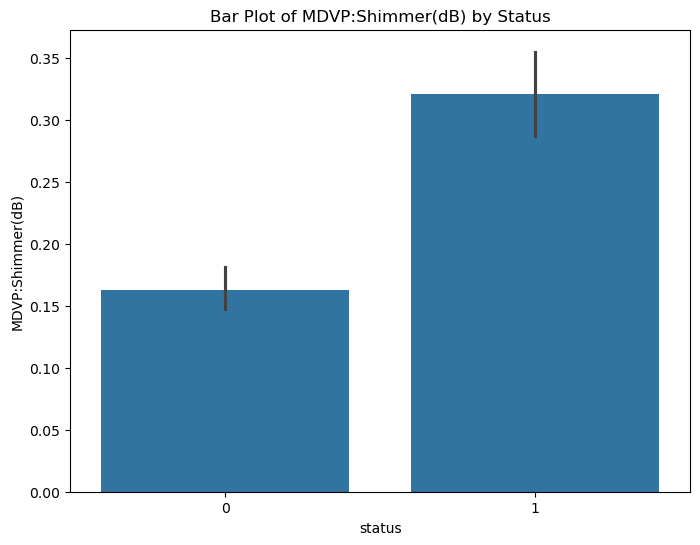

In [43]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="MDVP:Shimmer(dB)", data=df)  
plt.title("Bar Plot of MDVP:Shimmer(dB) by Status")
plt.show()

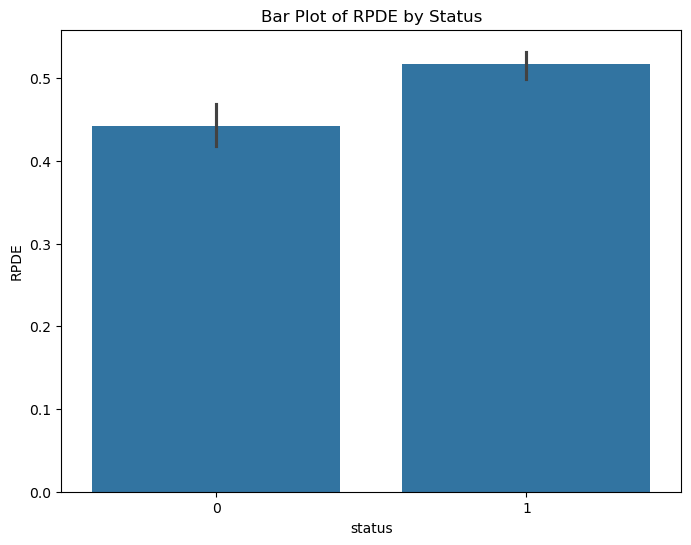

In [42]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="RPDE", data=df)  
plt.title("Bar Plot of RPDE by Status")
plt.show()

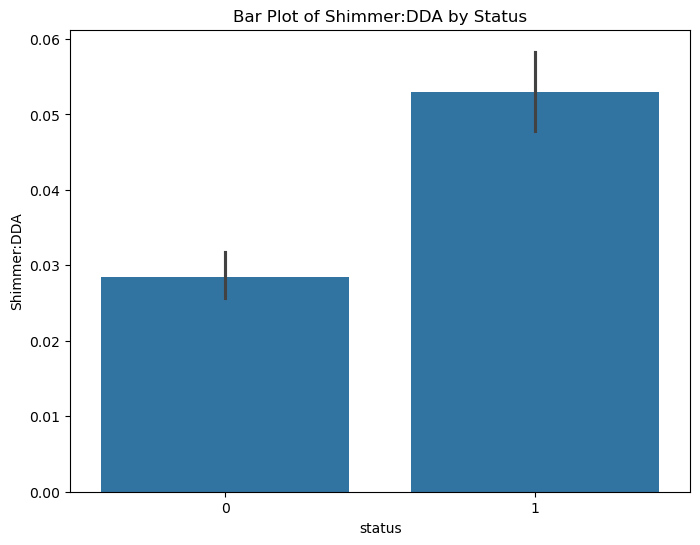

In [41]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="Shimmer:DDA", data=df)  
plt.title("Bar Plot of Shimmer:DDA by Status")
plt.show()

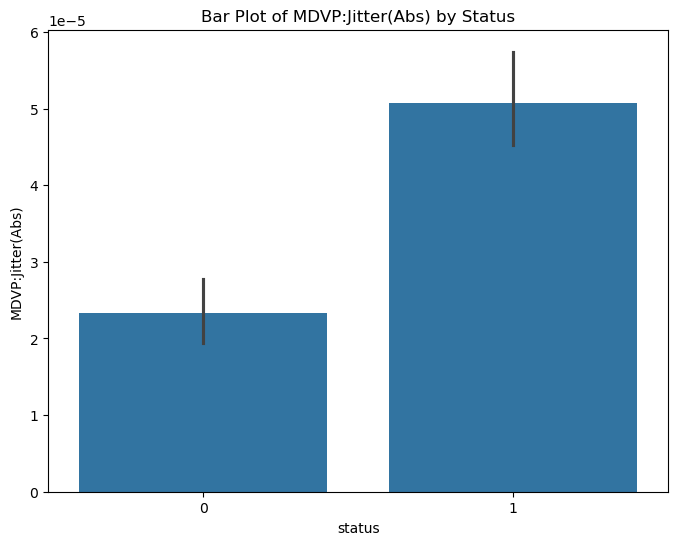

In [40]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="MDVP:Jitter(Abs)", data=df)  
plt.title("Bar Plot of MDVP:Jitter(Abs) by Status")
plt.show()

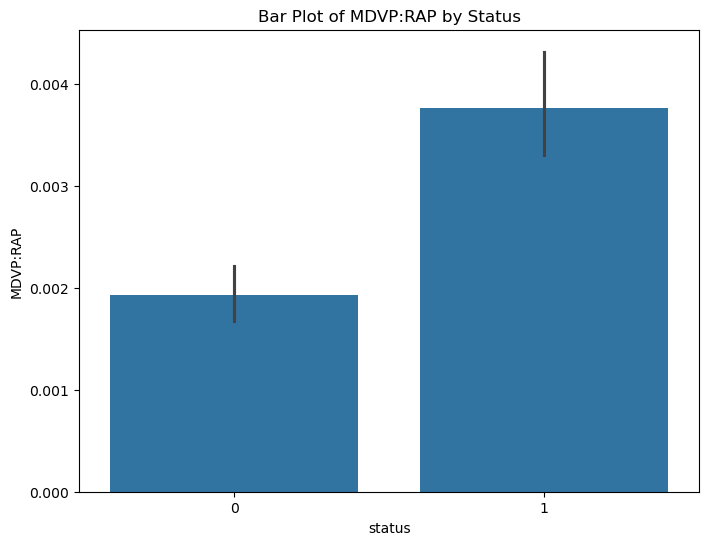

In [39]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="MDVP:RAP", data=df)  
plt.title("Bar Plot of MDVP:RAP by Status")
plt.show()

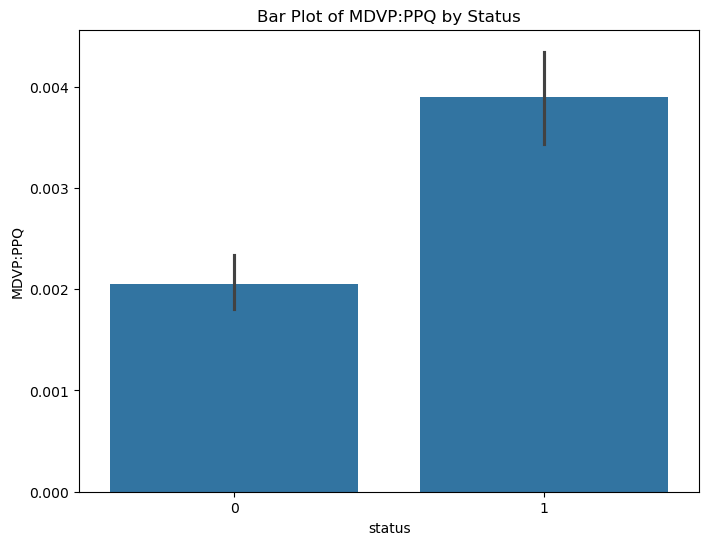

In [38]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="MDVP:PPQ", data=df)  
plt.title("Bar Plot of MDVP:PPQ by Status")
plt.show()

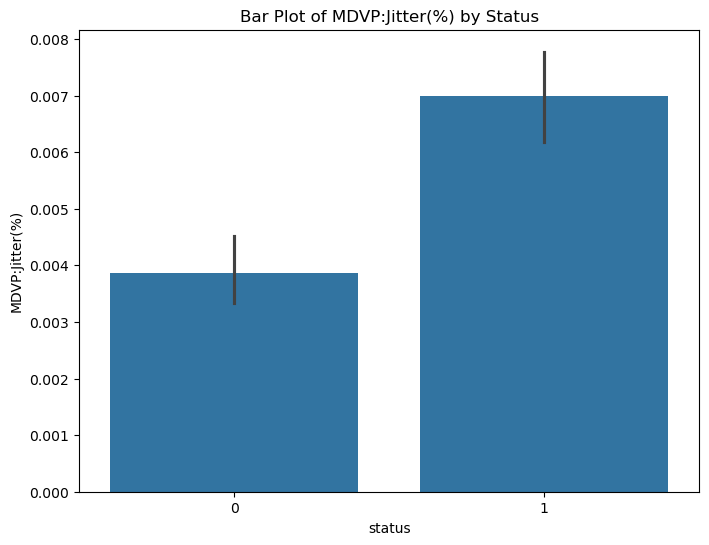

In [37]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="status", y="MDVP:Jitter(%)", data=df)  
plt.title("Bar Plot of MDVP:Jitter(%) by Status")
plt.show()

In [ ]:
# Checking and correcting the outlaires
# "PPE","spread1","spread2","MDVP:Shimmer","MDVP:APQ","Shimmer:APQ3","Shimmer:APQ5","MDVP:Shimmer(dB)"(Highly corelated)
# "RPDE","Shimmer:DDA","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP",MDVP:Jitter(%)(medium corelated)

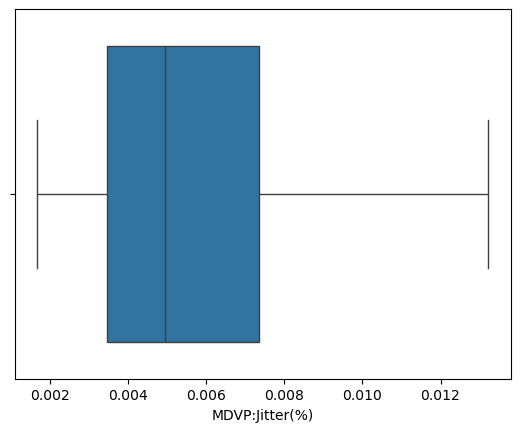

In [95]:
sns.boxplot(x=df1['MDVP:Jitter(%)'])  
plt.show()

In [94]:
#caping the Outliers (Treated)
Q1 = df1["MDVP:Jitter(%)"].quantile(0.25)
Q3 = df1["MDVP:Jitter(%)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1["MDVP:Jitter(%)"] = np.where(df1["MDVP:Jitter(%)"] < lower_bound, lower_bound, df1["MDVP:Jitter(%)"])
df1["MDVP:Jitter(%)"] = np.where(df1["MDVP:Jitter(%)"] > upper_bound, upper_bound, df1["MDVP:Jitter(%)"])

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [98]:
from imblearn.under_sampling import RandomUnderSampler

# Define features and target
X = df1.drop(columns=['status'])  # Replace 'status' with your target column
y = df1['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE with a slightly higher sampling strategy
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Increase the ratio to get more samples
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
unique, counts = np.unique(y_smote, return_counts=True)
print("After SMOTE:", dict(zip(unique, counts)))

# Compute required class counts
num_class_1 = counts[1]  # Get count of class 1
target_class_0 = 195 - num_class_1  # Ensure total count is exactly 195

# Apply undersampling only if necessary
if counts[0] > target_class_0:
    undersample = RandomUnderSampler(sampling_strategy={0: target_class_0}, random_state=42)
    X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote)
else:
    X_resampled, y_resampled = X_smote, y_smote  # Keep data if no undersampling needed

# Check final class distribution
print("After final undersampling:", np.bincount(y_resampled))
print("Total samples after resampling:", len(y_resampled))

After SMOTE: {0: 94, 1: 118}
After final undersampling: [ 77 118]
Total samples after resampling: 195


In [99]:
y = y_resampled

In [103]:
type(y)

pandas.core.frame.DataFrame

In [102]:
y = pd.DataFrame(y_resampled, columns=['status'])

In [116]:
y = y.squeeze()

In [ ]:
# To selected featurs to the models

In [104]:
features_scale = ["PPE","spread1","spread2","MDVP:Shimmer","MDVP:APQ","Shimmer:APQ3","Shimmer:APQ5","MDVP:Shimmer(dB)",
                  "RPDE","Shimmer:DDA","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Jitter(%)"]

In [106]:
scaler = MinMaxScaler()

In [107]:
#featurs 
df_scaled = df1.copy()
df_scaled[features_scale] = scaler.fit_transform(df1[features_scale])

In [108]:
#featurs 
X_scaled = df_scaled[features_scale]

In [109]:
print(X_scaled.head())

        PPE   spread1   spread2  MDVP:Shimmer  MDVP:APQ  Shimmer:APQ3  \
0  0.629010  0.627298  0.594604      0.566085  0.482330      0.511780   
1  0.849111  0.774142  0.759330      0.857403  0.781538      0.793895   
2  0.754700  0.700906  0.701130      0.708268  0.614907      0.682175   
3  0.849900  0.765722  0.755890      0.751138  0.653887      0.731664   
4  0.958247  0.839302  0.518403      0.905570  0.802313      0.899393   

   Shimmer:APQ5  MDVP:Shimmer(dB)      RPDE  Shimmer:DDA  MDVP:Jitter(Abs)  \
0      0.713489          0.601146  0.369155     0.511729          0.557522   
1      1.000000          0.953724  0.470830     0.794015          0.646018   
2      0.916388          0.699868  0.404416     0.682108          0.734513   
3      0.957358          0.761569  0.416255     0.731592          0.734513   
4      1.000000          0.879683  0.375159     0.899402          0.911504   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Jitter(%)  
0  0.470588  0.747875    0.470252       

In [110]:
#features 
X = X_scaled

In [111]:
type(X_scaled)

pandas.core.frame.DataFrame

In [112]:
# Ensure y has the same length as X

print(f"X shape: {X.shape}, y shape: {y.shape}")  # Debugging

if len(X) != len(y):
    y = y.iloc[:len(X)]  

X shape: (195, 15), y shape: (195, 1)


In [113]:
# Split into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
Lr = LogisticRegression(random_state=0)

In [121]:
logreg = Lr.fit(x_train, np.squeeze(y_train))

In [122]:
y_pred = logreg.predict(x_test)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5384615384615384
Confusion Matrix:
 [[ 0 15]
 [ 3 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.58      0.88      0.70        24

    accuracy                           0.54        39
   macro avg       0.29      0.44      0.35        39
weighted avg       0.36      0.54      0.43        39



In [126]:
Lr = LogisticRegression(random_state=0, class_weight='balanced')
logreg = Lr.fit(x_train, np.squeeze(y_train))

In [127]:
y_pred = logreg.predict(x_test)

In [128]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5897435897435898
Confusion Matrix:
 [[ 8  7]
 [ 9 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.68      0.62      0.65        24

    accuracy                           0.59        39
   macro avg       0.58      0.58      0.58        39
weighted avg       0.60      0.59      0.59        39



In [129]:
Lr = LogisticRegression(C=0.1, random_state=0, class_weight='balanced')
logreg = Lr.fit(x_train, np.squeeze(y_train))
y_pred = logreg.predict(x_test)

In [130]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.48717948717948717
Confusion Matrix:
 [[ 7  8]
 [12 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.47      0.41        15
           1       0.60      0.50      0.55        24

    accuracy                           0.49        39
   macro avg       0.48      0.48      0.48        39
weighted avg       0.51      0.49      0.49        39



In [135]:
# Create and train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtc = clf.fit(x_train, np.squeeze(y_train))

# Make predictions
y_pred = clf.predict(x_test)

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [138]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.62
Precision: 0.71
Recall: 0.62
F1 Score: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.71      0.62      0.67        24

    accuracy                           0.62        39
   macro avg       0.61      0.61      0.61        39
weighted avg       0.63      0.62      0.62        39



In [141]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=0)
dtc = dtc.fit(x_train, np.squeeze(y_train))
y_pred = clf.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.62
Precision: 0.71
Recall: 0.62
F1 Score: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.71      0.62      0.67        24

    accuracy                           0.62        39
   macro avg       0.61      0.61      0.61        39
weighted avg       0.63      0.62      0.62        39



In [149]:
# Initialize Decision Tree with class_weight='balanced'
dtc = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    class_weight={0: 2, 1: 1},
    random_state=0
)

# Train the model
dtc = dtc.fit(x_train, np.squeeze(y_train))

# Make predictions
y_pred = dtc.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.59
Precision: 0.75
Recall: 0.50
F1 Score: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        15
           1       0.75      0.50      0.60        24

    accuracy                           0.59        39
   macro avg       0.61      0.62      0.59        39
weighted avg       0.65      0.59      0.59        39



In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, 
    max_depth=5, 
    class_weight={0: 2, 1: 1}, 
    random_state=0)
rf.fit(x_train, np.squeeze(y_train))
y_pred_rf = rf.predict(x_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.79


In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight={0: 2, 1: 1}, random_state=0)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, np.squeeze(y_train))

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


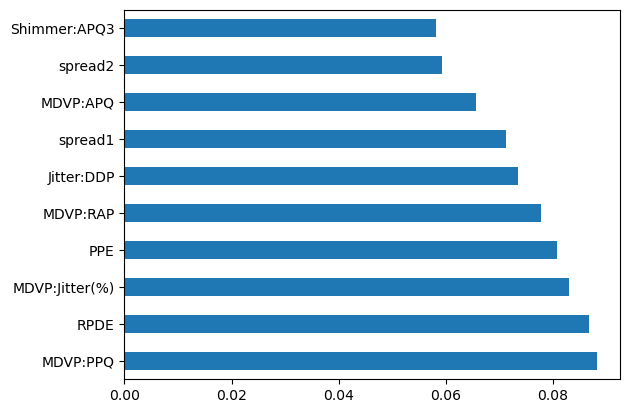

In [158]:
# Check if feature importance attribute exists
if hasattr(best_rf, "feature_importances_"):
    feature_importance = pd.Series(best_rf.feature_importances_, index=x_train.columns)
    feature_importance.nlargest(10).plot(kind='barh')
    plt.show()
else:
    print("Feature importance is not available for this model.")

In [159]:
from sklearn.feature_selection import RFE

rfe = RFE(best_rf, n_features_to_select=8)  # Select the top 8 features
x_train_rfe = rfe.fit_transform(x_train, np.squeeze(y_train))
x_test_rfe = rfe.transform(x_test)

best_rf.fit(x_train_rfe, np.squeeze(y_train))
y_pred_rfe = best_rf.predict(x_test_rfe)

print("Accuracy after feature selection:", accuracy_score(y_test, y_pred_rfe))

Accuracy after feature selection: 0.6666666666666666


In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 500],  
    'max_depth': [5, 7, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_rfe, np.squeeze(y_train))

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.814516129032258


In [166]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_random_forest.pkl')

print("Model saved successfully!")

Model saved successfully!


In [161]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5)
xgb.fit(x_train_rfe, np.squeeze(y_train))
y_pred_xgb = xgb.predict(x_test_rfe)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7692307692307693
